In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_data = pd.read_csv('ford.csv')

df = main_data.copy()

In [3]:
df.head() # data seitimizin basi 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.describe() ## describe bilgisi

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
df.info() ## info ile object olan sutunlara bakup kullanicaklarimi sayisal degere cevirecegim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df['transmission'].value_counts() ## 3 farkli deger 

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [7]:
df['fuelType'].value_counts() ## 5 farkli deger barindiriyor 

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [8]:
 adjusted_df = pd.get_dummies(df,columns=['transmission','fuelType']) ## dummies yardimi ile cevirme

In [9]:
adjusted_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,True,False,False,False,False,False,False,True
1,Focus,2018,14000,9083,150,57.7,1.0,False,True,False,False,False,False,False,True
2,Focus,2017,13000,12456,150,57.7,1.0,False,True,False,False,False,False,False,True
3,Fiesta,2019,17500,10460,145,40.3,1.5,False,True,False,False,False,False,False,True
4,Fiesta,2019,16500,1482,145,48.7,1.0,True,False,False,False,False,False,False,True


In [10]:
adjusted_df.columns ## sutun ismlerinden memnun degilim bu sebeple biraz degisiklik uygulayacagim

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [11]:
adjusted_df.columns = [['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Hybrid', 'fuel_Other', 'fuel_Petrol']] ## yeni sutun isimleri

In [12]:
adjusted_df['transmission_Automatic'] = adjusted_df['transmission_Automatic'].astype(int)
adjusted_df['transmission_Manual'] = adjusted_df['transmission_Manual'].astype(int)
adjusted_df['transmission_Semi'] = adjusted_df['transmission_Semi'].astype(int)
adjusted_df['fuel_Diesel'] = adjusted_df['fuel_Diesel'].astype(int)
adjusted_df['fuel_Electric'] = adjusted_df['fuel_Electric'].astype(int)
adjusted_df['fuel_Hybrid'] = adjusted_df['fuel_Hybrid'].astype(int)
adjusted_df['fuel_Other'] = adjusted_df['fuel_Other'].astype(int)
adjusted_df['fuel_Petrol'] = adjusted_df['fuel_Petrol'].astype(int) ## dummies sonrasi boolean degerleri yerine sayisal degerler int getirdim

In [13]:
adjusted_df.info() ## simdi info sayseinde sadece 1 adet categorical sutunum kaldi o da kalsin digerlerini ML modeline girebilecek format haline getirdim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (model,)                   17966 non-null  object 
 1   (year,)                    17966 non-null  int64  
 2   (price,)                   17966 non-null  int64  
 3   (mileage,)                 17966 non-null  int64  
 4   (tax,)                     17966 non-null  int64  
 5   (mpg,)                     17966 non-null  float64
 6   (engineSize,)              17966 non-null  float64
 7   (transmission_Automatic,)  17966 non-null  int32  
 8   (transmission_Manual,)     17966 non-null  int32  
 9   (transmission_Semi,)       17966 non-null  int32  
 10  (fuel_Diesel,)             17966 non-null  int32  
 11  (fuel_Electric,)           17966 non-null  int32  
 12  (fuel_Hybrid,)             17966 non-null  int32  
 13  (fuel_Other,)              17966 non-null  int

In [14]:
adjusted_df.drop('model',axis=1).corr() ## Korelasyon String degerler ile birlikte calismaz
# bu sebeple geceici olarak model sutununu drop edip oyle korelasyona bakacagim ve price ile diger sutunlar arasinda olan 
# iliskileri inceleyecegim

C:\Users\Anıl Tek\AppData\Local\Temp\ipykernel_9648\2192246597.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  adjusted_df.drop('model',axis=1).corr() ## Korelasyon String degerler ile birlikte calismaz


,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311,0.036498,-0.037896,0.014022,-0.088734,-0.004459,0.024016,-0.006792,0.087045
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178,0.208185,-0.258757,0.141278,0.199945,0.007696,0.072889,0.002393,-0.205385
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035,-0.050340,0.059756,-0.030114,0.257624,-0.003468,-0.001368,-0.001492,-0.257126
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363,0.154952,-0.181723,0.089512,-0.128912,-0.019284,-0.007142,-0.013635,0.129953
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521,-0.235047,0.302291,-0.174106,0.293547,0.009788,0.106737,0.006921,-0.301532
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000,0.163889,-0.224341,0.140918,0.642144,0.015843,0.054416,0.011203,-0.646022
transmission_Automatic,0.036498,0.208185,-0.050340,0.154952,-0.235047,0.163889,1.000000,-0.720812,-0.072653,0.057914,0.036856,0.104260,0.026060,-0.066899
transmission_Manual,-0.037896,-0.258757,0.059756,-0.181723,0.302291,-0.224341,-0.720812,1.000000,-0.638930,-0.098333,-0.026566,-0.083519,-0.018784,0.105372
transmission_Semi,0.014022,0.141278,-0.030114,0.089512,-0.174106,0.140918,-0.072653,-0.638930,1.000000,0.077218,-0.002678,0.004466,-0.001893,-0.077374
fuel_Diesel,-0.088734,0.199945,0.257624,-0.128912,0.293547,0.642144,0.057914,-0.098333,0.077218,1.000000,-0.007250,-0.024060,-0.005127,-0.996815


# Degerlendirme

# Gorsellestirme Ile Anlatim

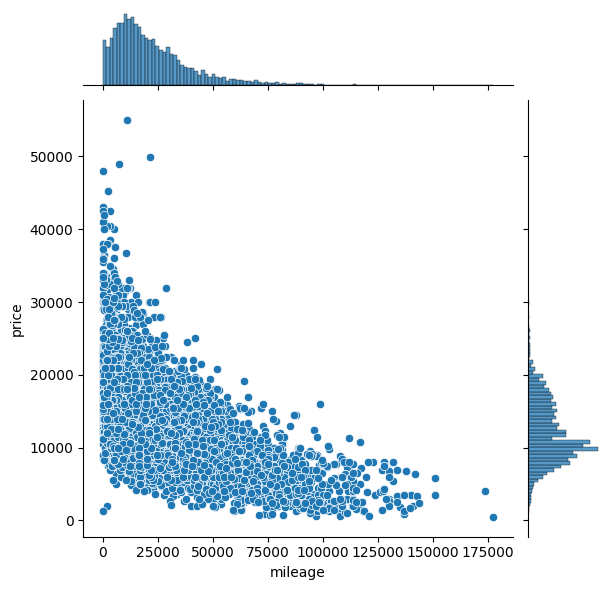

In [15]:
sns.jointplot(x='mileage',y='price',data=df) 

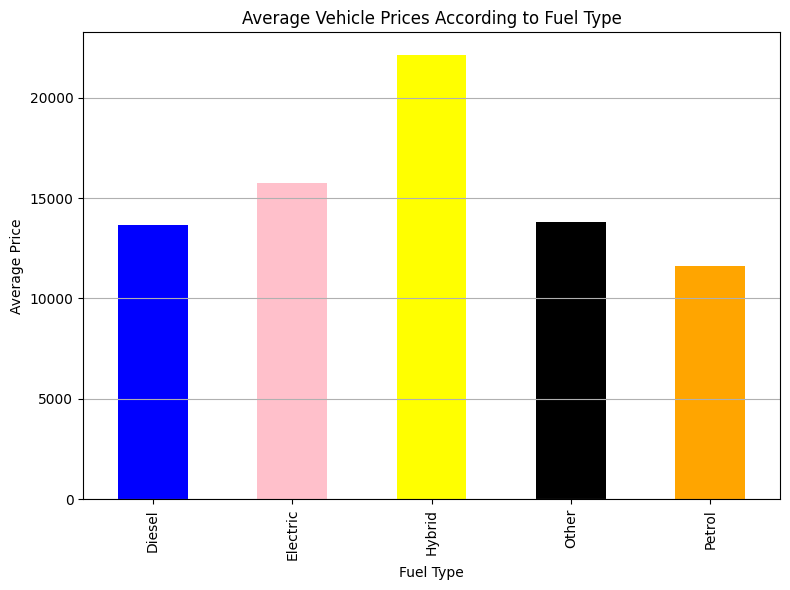

In [16]:
mean_prices = df.groupby('fuelType')['price'].mean() ## araclarin fuel tipine gore groupby yapilmasi ardindan degerlerinin ortalamasinin alinmasi
colors = ['blue', 'pink', 'yellow','black','orange'] ## bir plot olsuturcagim elimde 5 adet Categorical index oldugu icin 5 adet renk seciyorum 

plt.figure(figsize=(8, 6)) ## 8 e 6 lik bir plot taslaigi olusturdum
mean_prices.plot(kind='bar', color=colors)
plt.title('Average Vehicle Prices According to Fuel Type') ## Plotumun basligi
plt.xlabel('Fuel Type') ## X eksen labelinin ismi
plt.ylabel('Average Price')## Y eksen labelinin ismi
plt.grid(axis='y') ## y ekseninde olan her price point i ayirt edebilecek bir serit koyuyorum
plt.tight_layout()
plt.show()

In [17]:
df['fuelType'].value_counts() ## Petrol kullanan araclarin sayisini diger araclara kiyasla cook fazla olmasi bu konuda bizi yanlis bir 
## sonuca goturebilir ornek olarak 

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

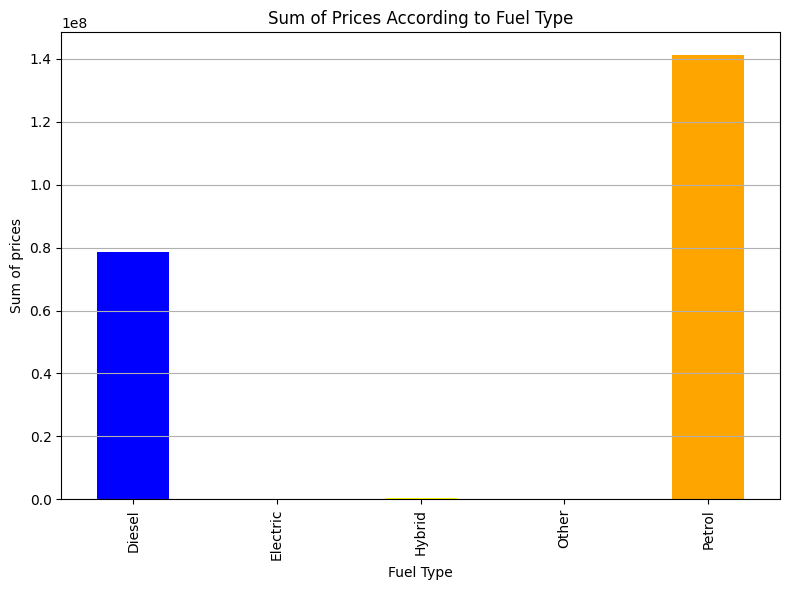

In [18]:
mean_prices = df.groupby('fuelType')['price'].sum()
colors = ['blue', 'pink', 'yellow','black','orange'] 

plt.figure(figsize=(8, 6)) 
mean_prices.plot(kind='bar', color=colors)
plt.title('Sum of Prices According to Fuel Type') 
plt.xlabel('Fuel Type')
plt.ylabel('Sum of prices')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Goruldugu gibi sayisindan kaynakli petrol ve dieselin markette olan dominasyonu farkli sonuclara goturebiliyor bu sebepten 
# dolayi (SUM) yerine (MEAN) Kullanildi yukaridaki Yanlis bir kullanim bicimdir

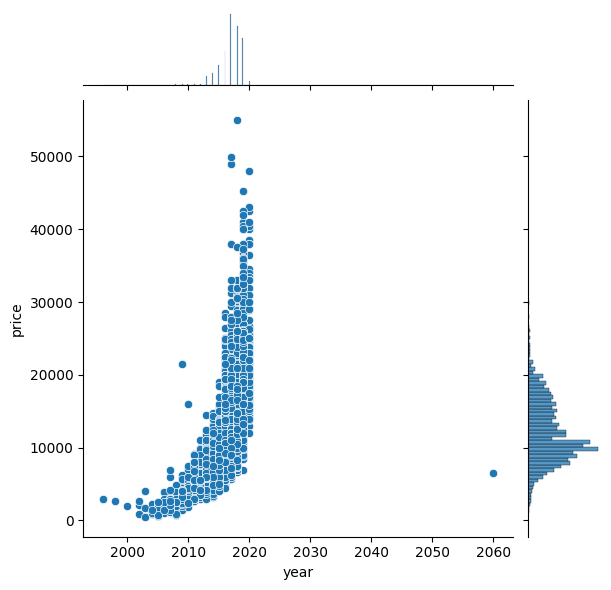

In [19]:
sns.jointplot(x='year',y='price',data=df) 

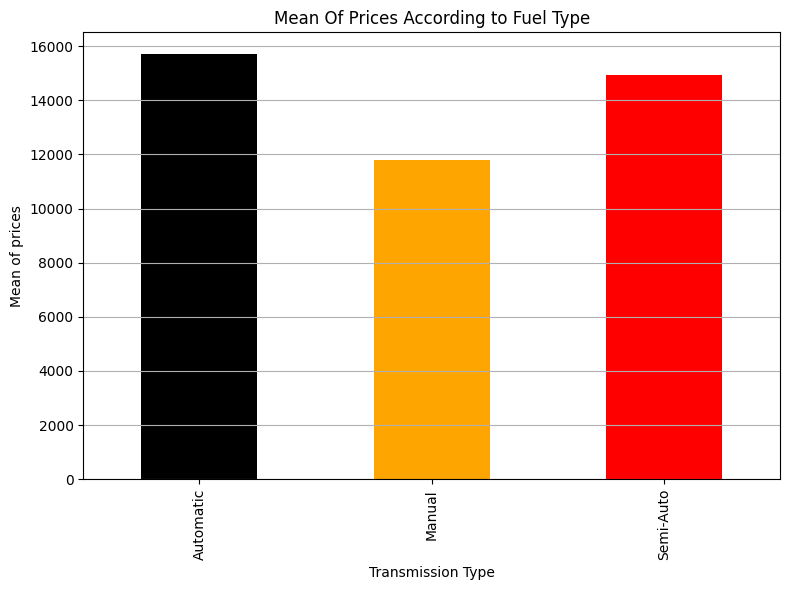

In [20]:
mean_prices = df.groupby('transmission')['price'].mean()
colors = ['black', 'orange', 'red'] 

plt.figure(figsize=(8, 6)) 
mean_prices.plot(kind='bar', color=colors)
plt.title('Mean Of Prices According to Fuel Type') 
plt.xlabel('Transmission Type')
plt.ylabel('Mean of prices')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

!! Sanziman olarak da goruldugu gibi manuel sanziman daha az Automatic sanziman ise daha az yari otomatik de ikisi arasinda bulunuyor
bunu sebebinin ben otomatik arablarin yil ve teknoloji sebebi ile yeni araclara daha fazla manuel ise eski arabalarda oldugundan bu farkin oldugunu
dusunuyorum yani artik otomatik vites normallesmis bos paketlerde dahil nerdedeyse bulundugu icin aslinda manual arabalarin fiyatinin eski olduklarindan
boyle olduklarini dusunuyorum inceleyecegim

In [21]:
year_transmission = df.groupby('year')['transmission'].value_counts()

In [22]:
transmission_year = df.groupby('transmission')['year'].mean()

In [23]:
transmission_year

transmission
Automatic    2017.127847
Manual       2016.835610
Semi-Auto    2016.979761
Name: year, dtype: float64

In [24]:
adjusted_df['year'].idxmax()

year    17726
dtype: int64

In [25]:
adjusted_df.drop(index=17726,inplace=True)
adjusted_df['year'].max()

year    2020
dtype: int64

## MODELS

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
X = adjusted_df.drop(['price','model'],axis=1)
y = adjusted_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Anıl Tek\AppData\Local\Temp\ipykernel_9648\612805166.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = adjusted_df.drop(['price','model'],axis=1)


# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
lr_predict = lr_model.predict(X_test)

In [31]:
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test,lr_predict)}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test,lr_predict,squared=False)}")
print(f"R-squared (R²): {r2_score(y_test,lr_predict)}")

Mean Absolute Error (MAE): 1757.6847650269644
Root Mean Squared Error (RMSE): 2440.817485133833
R-squared (R²): 0.7363987425938536


In [32]:
adjusted_df['price'].mean()

price    12279.856833
dtype: float64

In [33]:
new_data = np.array([[2000,10000,145,40.1,1.0,0,1,0,0,0,0,0,1]]) 
predicted=lr_model.predict(new_data)

print(f'tahmin edilen araba fiyati {predicted}' )

tahmin edilen araba fiyati [[-8522.08763674]]


In [34]:
adjusted_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,0,0,1
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,0,0,1
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,0,0,1
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,0,0,1
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,0,0,1


# Regression with TensorFlow

In [35]:
import tensorflow as tf

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test =  scaler.fit_transform(X_test)

In [38]:
#tensorflow_model = tf.keras.Sequential([
#    tf.keras.layers.Dense(64,activation='relu', 
#                         input_shape=(13,)),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(64,activation='relu'),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(64,activation='relu'),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(32,activation='relu'),
#    tf.keras.layers.Dense(1)
#])

In [39]:
#tensorflow_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [40]:
#tensorflow_model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

In [41]:
#loss = tensorflow_model.evaluate(X_test,y_test)
#print(f'Test Loss (RMSE) : {loss ** 0.5}')

In [42]:
adjusted_df['price'].mean()

price    12279.856833
dtype: float64

# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------

In [43]:
# yukarida yazdigim for loop sonucu olarak en optimum degerei veren kombinasyon (batch :32 epochs :600 lr :0.001 ) oldu
#tensorflow_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
#tensorflow_model.fit(X_train,y_train,epochs=600,batch_size=32,validation_split=0.2,verbose=0)
#loss = tensorflow_model.evaluate(X_test,y_test)
#print(f'Test Loss (RMSE) : {loss ** 0.5}')

In [44]:
X.head()

,year,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol
0,2017,15944,150,57.7,1.0,1,0,0,0,0,0,0,1
1,2018,9083,150,57.7,1.0,0,1,0,0,0,0,0,1
2,2017,12456,150,57.7,1.0,0,1,0,0,0,0,0,1
3,2019,10460,145,40.3,1.5,0,1,0,0,0,0,0,1
4,2019,1482,145,48.7,1.0,1,0,0,0,0,0,0,1


In [45]:
X_train.shape

(12036, 13)

## Her ne kadar RMSE degeri Linear Regressiondan tutarli ciksa da yeni verilerde predict i bazen cok kayitsiz dugumler ve dropoutlar degistigi zaman ise cok hassas ve ucuk degerlere kayiyor bu sebeple denemelerime ragmen pek basarili olmadi (RANDOM FOREST DENEYECEGIM)

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
X = adjusted_df.drop(['price','model'],axis=1)
y = adjusted_df['price']
## Validation setini bu sefer manuel olarak ayiriyorum tensorflow icinde halihazirda train data setinden ayirabiliyordu random forest bize 
## oyle bir secenek sunmuyor bu sebeple kendim ayriyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

C:\Users\Anıl Tek\AppData\Local\Temp\ipykernel_9648\3902051652.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = adjusted_df.drop(['price','model'],axis=1)


In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
val_predictions = rf_model.predict(X_val)
val_mse = (mean_squared_error(y_val, val_predictions)) **0.5
print("Validation seti üzerinde Ortalama Kare Hata (RMSE):", val_mse)
test_predictions = rf_model.predict(X_test)
test_mse = (mean_squared_error(y_test, test_predictions)) **0.5
print("Test seti üzerinde Ortalama Kare Hata (RMSE):", test_mse)

C:\Django\football\footenv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation seti üzerinde Ortalama Kare Hata (RMSE): 1404.9608281864178
Test seti üzerinde Ortalama Kare Hata (RMSE): 1420.5150922556224


In [49]:
import math

val_rmse = math.sqrt(val_mse)
test_rmse = math.sqrt(test_mse)

print("Validation seti üzerinde RMSE:", val_rmse)
print("Test seti üzerinde RMSE:", test_rmse)

Validation seti üzerinde RMSE: 37.48280710120865
Test seti üzerinde RMSE: 37.689721307746794


In [68]:
new_data = np.array([[2019,10000,350,1.1,1.0,0,1,0,0,0,0,1,0]]) 
predicted=rf_model.predict(new_data)

print(f'tahmin edilen araba fiyati {predicted}' )

tahmin edilen araba fiyati [18380.38]


In [51]:
df['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [69]:
from joblib import dump

In [70]:
dump(rf_model,'./../savedModels/carmodel.joblib')

['./../savedModels/carmodel.joblib']